#Linear Regression

In [2]:
# Author: Alexander Le
# Date: April 24, 2022

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [5]:
# Set random seed
np.random.seed(0)

$f(x) =\pi{x} +10$

In [6]:
#f(x) = pi(x)+10

def f(x):
    return np.pi*x +10
  
def f_with_noise(x):
    return f(x) + np.random.normal(0,20,size=x.shape)

In [7]:
# Generatae 100 data from [0,100) for x
X = np.arange(0,100)
y = f_with_noise(X)

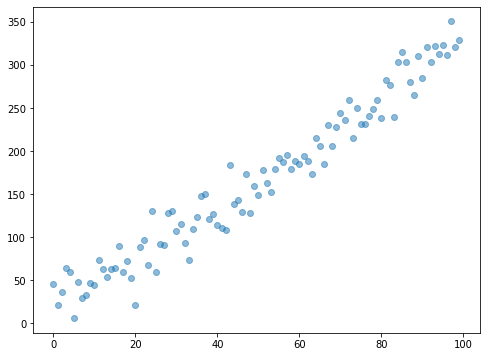

In [8]:
# Plot
plt.figure(figsize=[8,6])
plt.scatter(X, y, alpha = 0.5)

In [9]:
# Reshape X into (N, 1)
X = X.reshape(-1,1)


In [10]:
# Shape
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)


Shape of X: (100, 1)
Shape of Y: (100,)


In [11]:
# Split training and test data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# __init__ is the class constructor
#self.n and self.h are attributes of the class (base and height of Rectangle)
# area is a method which is essentially a fucntion except you invoke a methon
# on an object using the dot operator

class Rectangle:
  def __init__(self, b, h):
    self.b = b
    self.h = h

  def area(self):
    return self.b*self.h


In [13]:
# Make a rectangle
my_rect = Rectangle(3, 5)
print("Area: ", my_rect.area())

Area:  15


#Linear Regression
- N: # of samples
- f: # of features
- X: data; shape = (N, f)
- y: labels/targets, shape (N, )
- W: weights; shape = (f, )
- b: bias; scalar
- a: learning rate; scalar


<center> 

#Loss function - MSE

$ L(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y_i})$

# Gradients of Loss with respect to W, b

$\frac{\partial L}{\partial W}=\frac{2}{N} X^T(\hat{y} - y)$
<br> <br>
$\frac{\partial L}{\partial b}=\frac{2}{N} \sum_{i=1} ^N (\hat{y_i} - y_i)$

#Gradient Descent - update W, b accordingly

$W=W-\alpha\frac{\partial L}{\partial W}$
<br> 

$b=b-\alpha\frac{\partial L}{\partial b}$





In [14]:
# Linear Regression Class
class Linear_Regression():
  """
  Ordinary least squares Linear Regression:

  Linear_Regression fits a linear model with coefficients
  w = (w1, ..., wf) to minimize the residual sum of squares
  between the observed targets in the dataset, and the targets
  predicted by the linear optimization.

  Parameters:
    num_epoch - number of epochs
    lr - learning rate
    verbose - creates a plot if set to True
  
  Attributes:
    epochs - number of epochs
    alpha - learning rate
    verbose - creates a plot when fitting train data if set to True
    weights - numpy.ndarray with shape (f, )
    bias - float
    loss_history - list containing the loss of each epoch
  """
  def __init__(self, num_epochs = 50, lr = 0.00002, verbose = False):
    """
    Initializes a linear regression model.

    Parameters:
      num_epochs - number of epochs: int
      lr - learning rate: float
      verbose - verbose: boolean
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose
  
  def predict (self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters: 
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    #Implement predict using hypothesis
    predictions = X @ self.weights + self.bias
    return predictions

  def loss(self, y, y_hat):
    """
    Compute the Mean Squared Error (MSE) of the current predictions.

    Parameters:
      y - targets: numoy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns: 
      loss - float 
    """
    # Compute loss (MSE) 
    mse_calc = np.average((y - y_hat)**2)
    return mse_calc

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect to weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )
      
    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    #Compute gradients 
    dw = ((2/n)*X.T @ (y_hat-y))
    db = (2/n)*np.sum(y_hat - y)
    return dw, db

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns: 
      a reference to self
    """
    # initialize weights and bias
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand()
    self.loss_history = []

    # training loop
    for i in range(self.epochs):
      # make predictions
      predictions = self.predict(X)
      # compute loss
      loss = self.loss(y, predictions)
      dw, db = self.grads(X, y, predictions)

      # update self.weights and self.bias
      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db

      self.loss_history.append(loss)

    if self.verbose:
      plt.figure(figsize=[8,6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.loss_history) + 1), self.loss_history)
      plt.show()

    return self

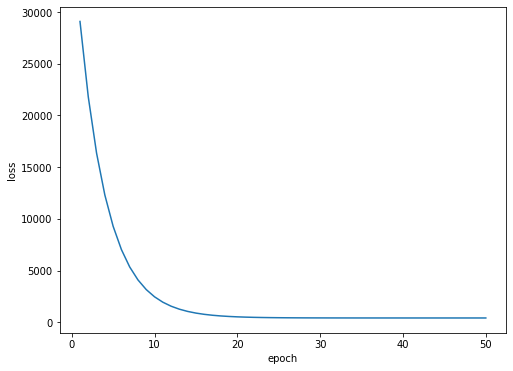

In [15]:
# fit the model to training data
lin_reg = Linear_Regression(verbose = True).fit(X_train, y_train)

In [16]:
print('weights: ', lin_reg.weights)
print('bias: ', lin_reg.bias.round(10))


weights:  [3.32103687]
bias:  0.6544168378


In [17]:
# make prediction on test data
y_pred = lin_reg.predict(X_test)


In [18]:
# r2 score
print('Test r2 score: ', r2_score(y_test, y_pred).round(3)) 
print('Train r2 score: ', r2_score(y_train, lin_reg.predict(X_train)).round(3))

Test r2 score:  0.902
Train r2 score:  0.952


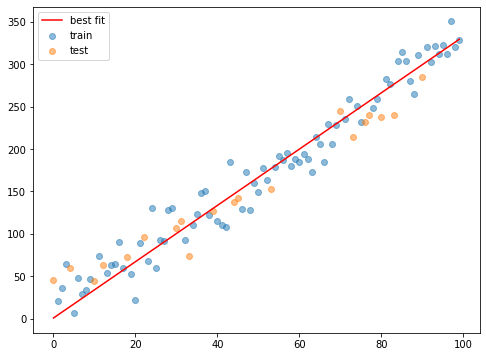

In [19]:
# plot data
plt.figure(figsize=[8,6])
plt.scatter(X_train, y_train, alpha = 0.5, label = 'train')
plt.scatter(X_test, y_test, alpha = 0.5, label = 'test')
plt.plot(X, lin_reg.predict(X), color = 'r', label = 'best fit')
plt.legend() 

#The effect of different learning rates

##Which learning rate would you pick for our model on this particular dataset, why?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in square


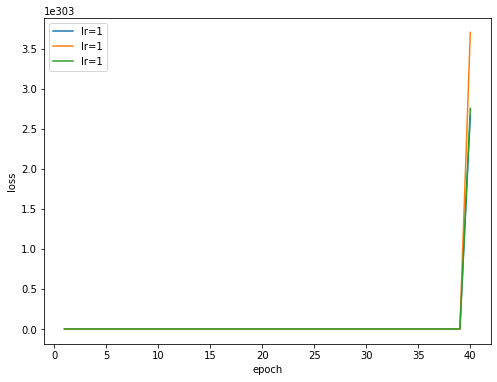

In [22]:
lr = [0.000005, 0.00002, 0.00008]
plt.figure(figsize=[8,6])
plt.xlabel('epoch')
plt.ylabel('loss')

for l in lr:
  lin_reg = Linear_Regression(lr=1).fit(X_train, y_train)
  plt.plot(np.arange(1, len(lin_reg.loss_history) + 1), lin_reg.loss_history, label = f'lr={1}')

plt.legend()
plt.show()

# Now lets apply our model to CA Housing Prices
Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [29]:
# Load the CA dataset
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()

In [28]:
# Documentation
print(cali.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
X = cali.data
y = cali.target

In [32]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# Fit training data 
lin_reg2 = Linear_Regression(num_epochs=10**(6), lr=3.2*10**(-6)).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
# Predict
y_pred = lin_reg2.predict(x)

In [ ]:
# r2 score
print('Test r2 score: ', r2_score(y_test, y_pred).round(3))

In [ ]:
# Compare our model to Sklearn's
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print('Test r2 score: ', reg.score(X_test, y_test).round(3))